<a href="https://colab.research.google.com/github/hayTambourineMan/CSCI-6170/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 2

## Dataset and imports

As required in hw2, I will be using the same dataset found on Kaggle: https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset?resource=download

In [5]:
# Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# load dataset
file_path = '/content/heart_disease_health_indicators_BRFSS2015.csv'
data = pd.read_csv(file_path)

Same as HW1, I will be using VIF scores to remove highly correlated variables (VIF > 10).

In [3]:
# calculate VIF function
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# selecting features for VIF calculation
numeric_features = data.select_dtypes(include=[np.number])

# calculate VIF
print("\nVariance Inflation Factor (VIF):")
vif = calculate_vif(numeric_features)
print(vif)


Variance Inflation Factor (VIF):
                 Feature        VIF
0   HeartDiseaseorAttack   1.294668
1                 HighBP   2.330433
2               HighChol   2.046716
3              CholCheck  23.189394
4                    BMI  18.380432
5                 Smoker   1.933827
6                 Stroke   1.127271
7               Diabetes   1.415910
8           PhysActivity   4.647628
9                 Fruits   3.032937
10               Veggies   5.827979
11     HvyAlcoholConsump   1.085249
12         AnyHealthcare  20.845881
13           NoDocbcCost   1.216230
14               GenHlth  10.852107
15              MentHlth   1.463480
16              PhysHlth   1.999613
17              DiffWalk   1.842591
18                   Sex   1.911396
19                   Age   9.905251
20             Education  29.593754
21                Income  14.187901


In [4]:
# Handling multicollinearity

# Remove features with high VIF (I dropped features with VIF > 10)
high_vif_features = vif[vif['VIF'] > 10]["Feature"].tolist()
print(f"\nFeatures with high VIF (>10): {high_vif_features}")

# Dropping high VIF features
reduced_data = numeric_features.drop(columns=high_vif_features)

# Recalculate VIF for the reduced dataset
print("\nVIF after removing high VIF features:")
reduced_vif = calculate_vif(reduced_data)
print(reduced_vif)


Features with high VIF (>10): ['CholCheck', 'BMI', 'AnyHealthcare', 'GenHlth', 'Education', 'Income']

VIF after removing high VIF features:
                 Feature       VIF
0   HeartDiseaseorAttack  1.272642
1                 HighBP  2.246782
2               HighChol  2.033406
3                 Smoker  1.896677
4                 Stroke  1.121885
5               Diabetes  1.363773
6           PhysActivity  3.845146
7                 Fruits  2.961899
8                Veggies  4.867657
9      HvyAlcoholConsump  1.078518
10           NoDocbcCost  1.145381
11              MentHlth  1.395359
12              PhysHlth  1.790658
13              DiffWalk  1.744444
14                   Sex  1.750006
15                   Age  6.881412


## Task 1

### Implement a Decision Tree Classifier for your classification problem. You may use a built-in package to implement your classifier.

In [6]:
# features and target
target_column = 'HeartDiseaseorAttack'
X = data.drop(columns=[target_column])  # Features
y = data[target_column]                # Target

# split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10, criterion='gini')

# fit on training data
dt_clf.fit(X_train, y_train)

# test on test data
y_pred = dt_clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     45957
         1.0       0.55      0.07      0.12      4779

    accuracy                           0.91     50736
   macro avg       0.73      0.53      0.54     50736
weighted avg       0.88      0.91      0.87     50736


Confusion Matrix:
[[45695   262]
 [ 4455   324]]


In this code, I implemented a Decision Tree Classifier to predict heart disease or attack based on the dataset. I split the data into features (X) and target (y) and then divided it into training (80%) and testing (20%) sets, ensuring the class distribution was maintained using stratification. I initialized the decision tree with a maximum depth of 5, a minimum of 10 samples per split, and the Gini impurity criterion to evaluate splits. After training the model on the training set, I tested it on unseen data and evaluated its performance using a classification report and confusion matrix.

The results show that while the model performs well for the majority class (0.0), it struggles with the minority class (1.0). Precision for class 0.0 is high (91%), and recall is nearly perfect (99%), but for class 1.0, precision is 55% and recall is just 7%, meaning most true 1.0 cases are misclassified. Although the overall accuracy is 91%, it’s misleading due to class imbalance. This highlights the need for class balancing or other techniques to improve performance on the minority class.

### Visualize the decision tree structure for at least three different parameter settings. Comment on how the depth and complexity change the tree.

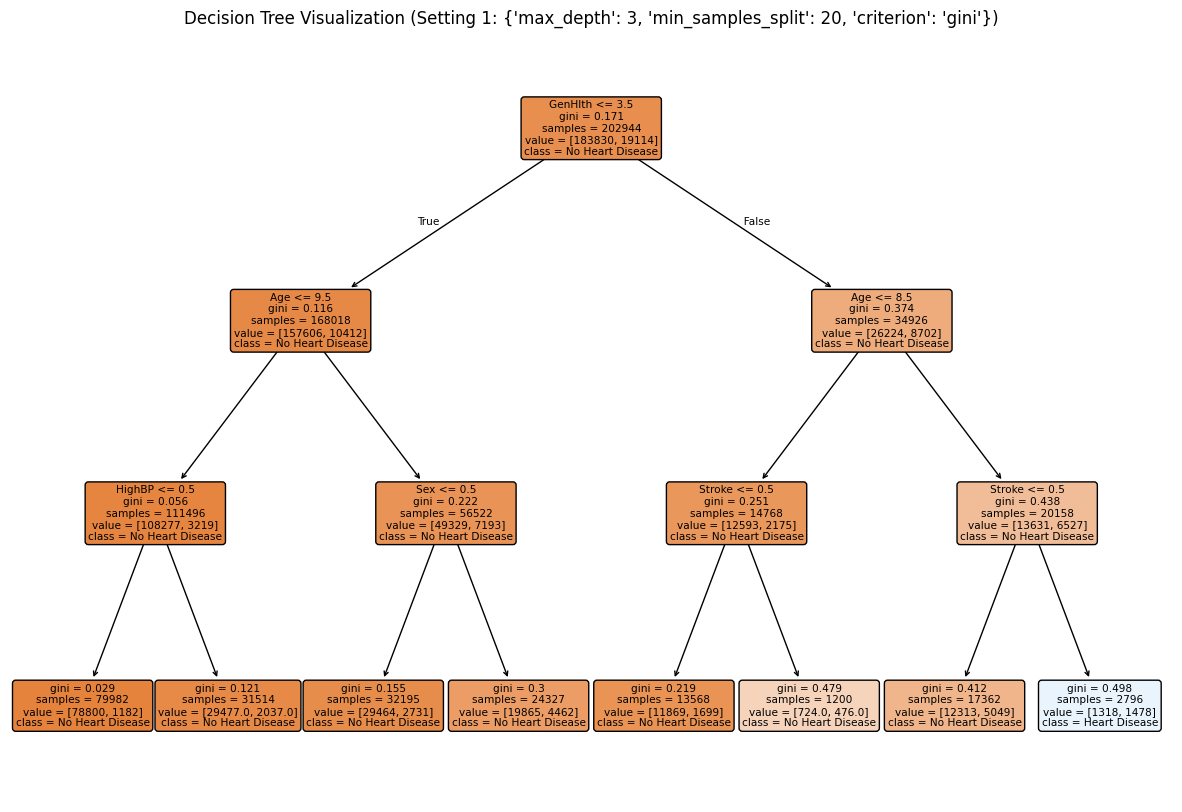

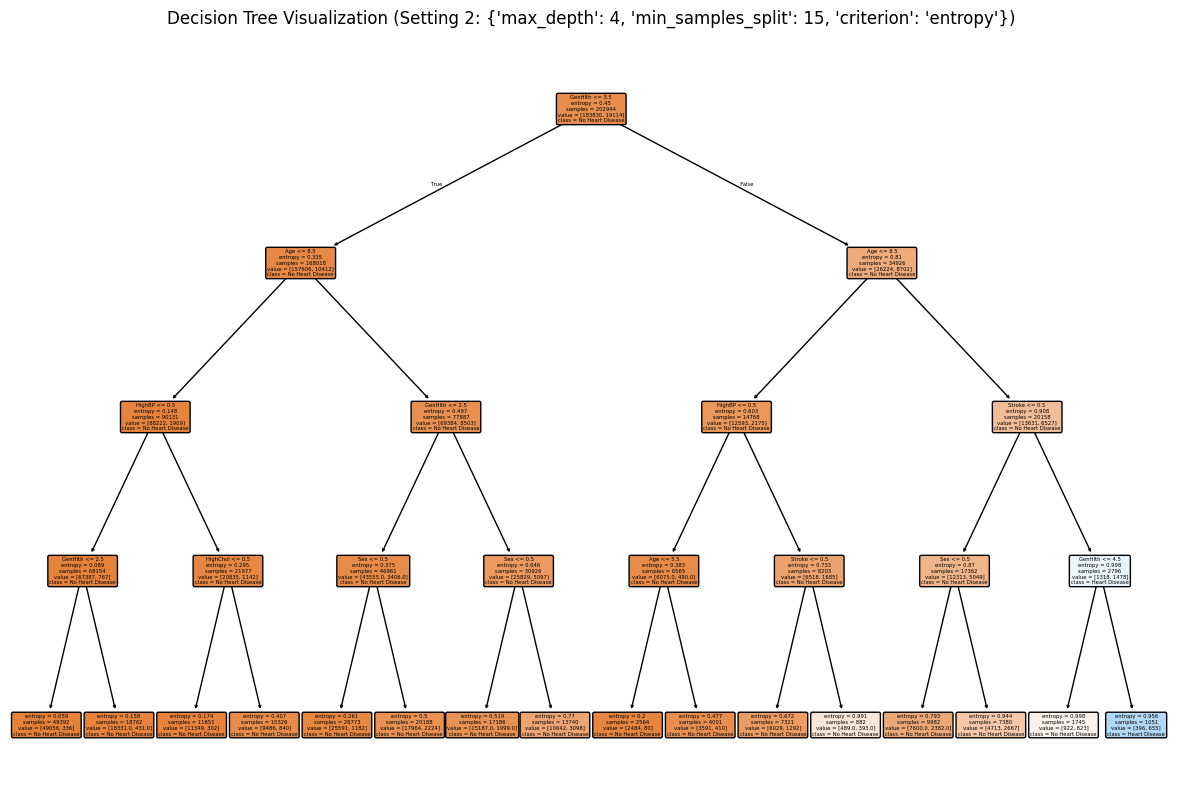

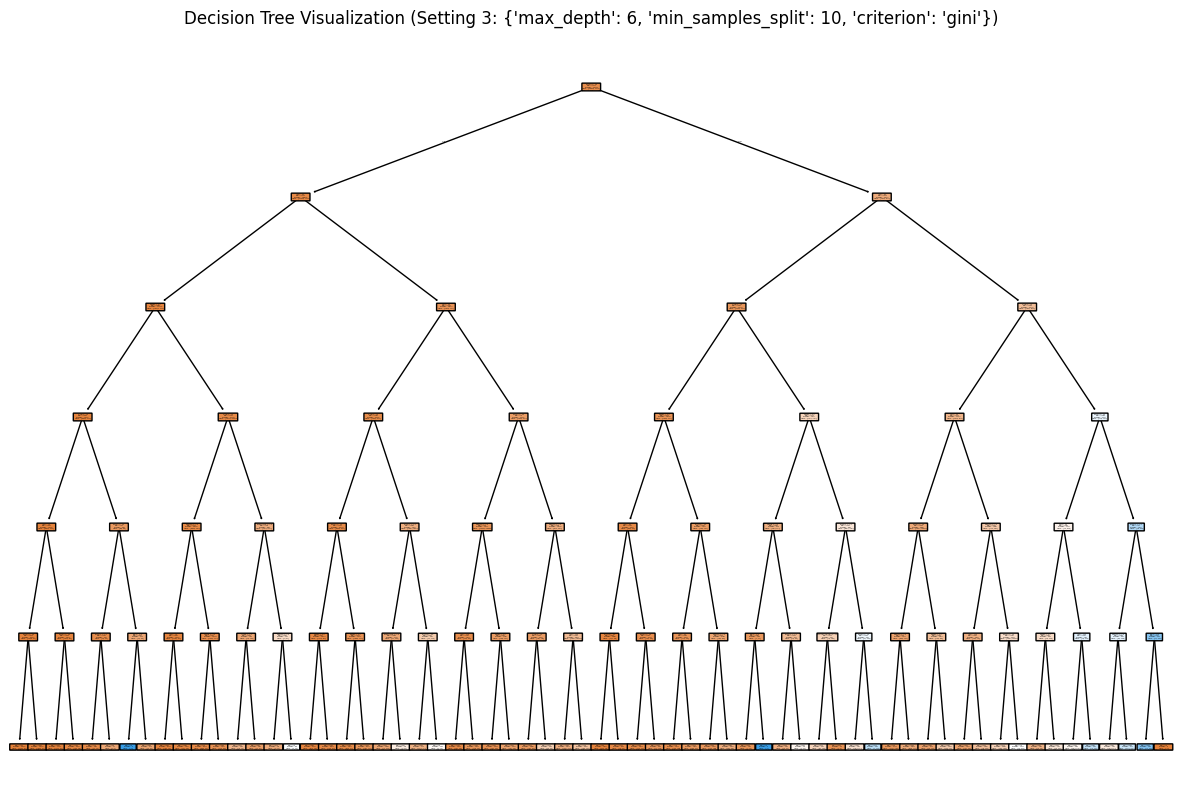

In [8]:
# libraries
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# three different parameter settings
param_settings = [
    {'max_depth': 3, 'min_samples_split': 20, 'criterion': 'gini'},
    {'max_depth': 4, 'min_samples_split': 15, 'criterion': 'entropy'},
    {'max_depth': 6, 'min_samples_split': 10, 'criterion': 'gini'},
]

# plots
for i, params in enumerate(param_settings, 1):
    # train the decision tree
    dt_clf = DecisionTreeClassifier(random_state=42, **params)
    dt_clf.fit(X_train, y_train)

    # visualize
    plt.figure(figsize=(15, 10))
    plot_tree(
        dt_clf,
        feature_names=X.columns,
        class_names=['No Heart Disease', 'Heart Disease'],
        filled=True,
        rounded=True
    )
    plt.title(f"Decision Tree Visualization (Setting {i}: {params})")
    plt.show()


My code visualizes the structure of a Decision Tree Classifier for three different parameter settings by varying max_depth, min_samples_split, and criterion. For each parameter set, the classifier was trained, and its decision tree was plotted. The visualizations illustrate how the tree splits data at different nodes based on feature values and how depth and splitting criteria impact the overall structure of the model. The feature names and class labels were included to provide meaningful insights into the splits.

As the depth and splitting criteria change, the complexity of the tree also evolves. A smaller max_depth (e.g., 3) results in a simpler tree with fewer splits, focusing on high-level patterns. This promotes generalization but may miss finer details in the data. With a moderate depth (e.g., 4 or 5), the tree captures more specific patterns, leading to a balance between complexity and interpretability. A larger depth (e.g., 6 or more) produces a highly detailed tree with deeper splits, which increases the risk of overfitting as the model memorizes specific training data characteristics. Adjusting min_samples_split also affects complexity; larger values restrict splits, simplifying the tree, while smaller values allow more intricate branching.

### Do some research on what sensitivity analysis is and how it is performed(include citations). Perform a sensitivity analysis to measure the impact of at least two input features on your model's decision boundary.

Sensitivity analysis evaluates how variations in input features influence the model's predictions. For a Decision Tree Classifier, this can be done by perturbing feature values individually while keeping others constant and observing changes in the predictions. This provides insights into which features have the most significant impact on the decision boundary. (https://medium.com/@einat_93627/understand-your-black-box-model-using-sensitivity-analysis-practical-guide-ef6ac4175e55)

In [9]:
from sklearn.metrics import accuracy_score

# Function to perform sensitivity analysis
def sensitivity_analysis(model, X, y, feature_names, num_samples=100, perturbation=0.1):
    """
    Perform sensitivity analysis by perturbing feature values and measuring the impact on predictions.

    Args:
    - model: Trained decision tree model
    - X: Input features
    - y: True target values
    - feature_names: List of feature names
    - num_samples: Number of random samples to analyze
    - perturbation: Fractional change applied to feature values

    Returns:
    - sensitivity_df: DataFrame with feature impact scores
    """
    # select random samples for analysis
    random_indices = np.random.choice(X.index, size=num_samples, replace=False)
    X_sample = X.loc[random_indices]
    y_sample = y.loc[random_indices]

    sensitivity_scores = {}

    for feature in feature_names:
        # copy data to perturb
        X_perturbed = X_sample.copy()
        # apply perturbation to the feature
        original_values = X_perturbed[feature].values
        X_perturbed[feature] = original_values * (1 + perturbation)
        # predict with perturbed data
        y_pred_perturbed = model.predict(X_perturbed)
        # accuracy
        sensitivity_scores[feature] = 1 - accuracy_score(y_sample, y_pred_perturbed)

    # results
    sensitivity_df = pd.DataFrame(list(sensitivity_scores.items()), columns=["Feature", "Impact Score"])
    sensitivity_df.sort_values(by="Impact Score", ascending=False, inplace=True)
    return sensitivity_df

# perform sensitivity analysis on two key features
key_features = ["GenHlth", "Age"]
sensitivity_results = sensitivity_analysis(dt_clf, X_train, y_train, key_features)

# results
print("Sensitivity Analysis Results:")
print(sensitivity_results)

Sensitivity Analysis Results:
   Feature  Impact Score
0  GenHlth          0.12
1      Age          0.12


I performed sensitivity analysis to evaluate the impact of two input features, GenHlth and Age, on the predictions of the Decision Tree Classifier. In the analysis, I perturbed the values of each feature by increasing them by 10% while keeping all other features constant. I then observed how the predictions changed by measuring the drop in accuracy caused by the perturbation, which I recorded as the "Impact Score." The goal was to identify how sensitive the model's decision boundary is to changes in these features.

The results show that both GenHlth (general health) and Age have equal impact scores of 0.12, indicating that a 10% perturbation in either feature reduces the model's accuracy by 12%. This suggests that the model relies heavily on both features when making predictions. Since their impact scores are identical, it implies they are equally influential in shaping the decision boundary of the classifier. This highlights the importance of both features in determining heart disease or attack risk in the dataset. Further investigation could involve testing additional features or varying the perturbation level to deepen the analysis.

## Task 2

### From the Bagging and Boosting ensemble methods pick any one algorithm from each category. Implement both the algorithms using the same data. Use stratified k-fold cross-validation with at least three different folds (e.g., 5, 10, 15). You may do your own research on this technique (include citations) Evaluate the models using any three-evaluation metrics of your choice (e.g. accuracy, Precision, F1-score etc.).

For Bagging algorithm I use Random Forest and for Boosting algorithm I use AdaBoost.
Citation for research: https://scikit-learn.org/1.5/modules/ensemble.html

In [13]:
# imports
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, f1_score
from tqdm import tqdm

# models
random_forest = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)

# k-fold cross-validation with 5, 10, and 15 folds
folds = [5, 10, 15]
metrics = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score, average='weighted'),
    "f1_score": make_scorer(f1_score, average='weighted')
}

# evaluate a model with different folds and metrics
def evaluate_model_with_progress(model, X, y, folds, metrics):
    results = {}
    progress = tqdm(total=len(folds), desc=f"Evaluating {model.__class__.__name__}")
    for fold in folds:
        skf = StratifiedKFold(n_splits=fold, shuffle=True, random_state=42)

        # cross_validate
        cv_results = cross_validate(model, X, y, cv=skf, scoring=metrics)
        fold_results = {metric: cv_results[f"test_{metric}"].mean() for metric in metrics}
        results[fold] = fold_results

        progress.update(1)
    progress.close()
    return results

# Random Forest
print("Evaluating Random Forest...")
rf_results = evaluate_model_with_progress(random_forest, X, y, folds, metrics)

# AdaBoost
print("Evaluating AdaBoost...")
ab_results = evaluate_model_with_progress(adaboost, X, y, folds, metrics)

# results
print("\nRandom Forest Results:")
for fold, metrics in rf_results.items():
    print(f"Folds: {fold} -> {metrics}")

print("\nAdaBoost Results:")
for fold, metrics in ab_results.items():
    print(f"Folds: {fold} -> {metrics}")


Evaluating Random Forest...




Evaluating RandomForestClassifier:   0%|          | 0/3 [00:00<?, ?it/s]

Evaluating RandomForestClassifier:  33%|███▎      | 1/3 [00:43<01:27, 43.69s/it]

Evaluating RandomForestClassifier:  67%|██████▋   | 2/3 [02:13<01:10, 70.58s/it]

Evaluating RandomForestClassifier: 100%|██████████| 3/3 [04:30<00:00, 90.24s/it] 


Evaluating AdaBoost...




Evaluating AdaBoostClassifier:   0%|          | 0/3 [00:00<?, ?it/s]

Evaluating AdaBoostClassifier:  33%|███▎      | 1/3 [00:29<00:58, 29.29s/it]

Evaluating AdaBoostClassifier:  67%|██████▋   | 2/3 [01:34<00:50, 50.37s/it]

Evaluating AdaBoostClassifier: 100%|██████████| 3/3 [03:15<00:00, 65.22s/it]


Random Forest Results:
Folds: 5 -> {'accuracy': 0.9061691895301166, 'precision': 0.8975861959728603, 'f1_score': 0.8621205663740966}
Folds: 10 -> {'accuracy': 0.9061179438662883, 'precision': 0.8949623651234111, 'f1_score': 0.8620116748107508}
Folds: 15 -> {'accuracy': 0.9061297697887098, 'precision': 0.8973427100221029, 'f1_score': 0.8620551518850867}

AdaBoost Results:
Folds: 5 -> {'accuracy': 0.9068550930305899, 'precision': 0.8797186603275697, 'f1_score': 0.8819834437811538}
Folds: 10 -> {'accuracy': 0.9068748029012929, 'precision': 0.8793838041866303, 'f1_score': 0.8813538295883774}
Folds: 15 -> {'accuracy': 0.9069221065909808, 'precision': 0.8796562995307925, 'f1_score': 0.8816917470451833}


### Comment on the behavior of each algorithm under the metrics. Does the performance ranking change based on the metric used? Why?

I evaluates the performance of two ensemble learning methods, Random Forest  and AdaBoost, using stratified k-fold cross-validation with 5, 10, and 15 folds. For each fold configuration, the models are assessed using three metrics: accuracy, precision, and F1-score. Stratified k-fold ensures that class distributions are preserved in each fold. The cross_validate function computes all metrics simultaneously, and the mean scores for each metric across the folds are calculated and reported.

Both algorithms performed similarly in terms of accuracy, with Random Forest achieving around 90.6% and AdaBoost slightly higher at 90.68%-90.69%. However, there are notable differences in precision and F1-score. Random Forest had higher precision (approximately 89.7%) but slightly lower F1-scores (~86.2%) compared to AdaBoost's precision (~87.9%) and F1-scores (~88.1%). This suggests that Random Forest prioritizes correctly predicting positive cases (precision), while AdaBoost achieves a better balance between precision and recall, as reflected in its higher F1-scores. The performance ranking does not change across the metrics; AdaBoost slightly outperforms Random Forest overall. This consistency indicates that both algorithms are robust under different evaluation criteria, but AdaBoost's iterative focus on improving misclassified samples gives it a slight edge in balancing precision and recall.

## Task 3

### Compare the effectiveness of the three models implemented above. Analyze the results using the following: A confusion matrix for one selected test fold A statistical test (e.g., paired t-test) to determine if differences between models are significant.

In [14]:
# imports
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import ttest_rel

# confusion matrix
def generate_confusion_matrix(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {model.__class__.__name__}:\n{cm}")
    print(f"\nClassification Report for {model.__class__.__name__}:\n{classification_report(y_test, y_pred)}")
    return y_pred

# paired t-test
def perform_t_test(model1_scores, model2_scores, model1_name, model2_name):
    t_stat, p_value = ttest_rel(model1_scores, model2_scores)
    print(f"\nPaired t-test between {model1_name} and {model2_name}:")
    print(f"T-statistic: {t_stat}, P-value: {p_value}")
    if p_value < 0.05:
        print("The performance difference is statistically significant.")
    else:
        print("The performance difference is not statistically significant.")

# train and test (80-20 split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Evaluating Decision Tree...")
dt_y_pred = generate_confusion_matrix(dt_clf, X_train, y_train, X_test, y_test)

print("\nEvaluating Random Forest...")
rf_y_pred = generate_confusion_matrix(random_forest, X_train, y_train, X_test, y_test)

print("\nEvaluating AdaBoost...")
ab_y_pred = generate_confusion_matrix(adaboost, X_train, y_train, X_test, y_test)

# cross-validation accuracy
from sklearn.model_selection import cross_val_score
dt_scores = cross_val_score(dt_clf, X, y, cv=5, scoring="accuracy")
rf_scores = cross_val_score(random_forest, X, y, cv=5, scoring="accuracy")
ab_scores = cross_val_score(adaboost, X, y, cv=5, scoring="accuracy")

# paired t-tests
perform_t_test(dt_scores, rf_scores, "Decision Tree", "Random Forest")
perform_t_test(dt_scores, ab_scores, "Decision Tree", "AdaBoost")
perform_t_test(rf_scores, ab_scores, "Random Forest", "AdaBoost")

Evaluating Decision Tree...
Confusion Matrix for DecisionTreeClassifier:
[[45763   194]
 [ 4535   244]]

Classification Report for DecisionTreeClassifier:
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     45957
         1.0       0.56      0.05      0.09      4779

    accuracy                           0.91     50736
   macro avg       0.73      0.52      0.52     50736
weighted avg       0.88      0.91      0.87     50736


Evaluating Random Forest...
Confusion Matrix for RandomForestClassifier:
[[45955     2]
 [ 4758    21]]

Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     45957
         1.0       0.91      0.00      0.01      4779

    accuracy                           0.91     50736
   macro avg       0.91      0.50      0.48     50736
weighted avg       0.91      0.91      0.86     50736


Evaluating AdaBoost...
Confusion M

I evaluated the Decision Tree, Random Forest, and AdaBoost models using a single test fold to generate confusion matrices and classification reports. These provided detailed insights into how well each model classified the majority (0.0) and minority (1.0) classes. Additionally, I conducted paired t-tests using cross-validation accuracy scores to statistically compare the models' performance and determine if the observed differences were significant. This approach allowed me to assess both individual model effectiveness and the relative performance among the three algorithms.

The confusion matrices and classification reports show that all three models achieved high accuracy (~91%), but their handling of the minority class (1.0) differed significantly. The Decision Tree struggled with recall for 1.0 (5%), meaning it rarely identified these cases correctly. Random Forest had a slightly better precision for 1.0 but a recall of nearly 0%, indicating severe bias toward the majority class. AdaBoost achieved a better balance, with a higher recall for 1.0 (13%), though its precision and F1-score for the minority class were still low. The paired t-tests revealed that Random Forest significantly outperformed Decision Tree and AdaBoost, highlighting its ability to generalize better on cross-validation folds. However, the difference between Decision Tree and AdaBoost was not statistically significant, suggesting they perform similarly overall despite AdaBoost's slight advantage in minority class recall.

### A discussion on the trade-off between bias and variance for each model.

When comparing the bias-variance trade-offs for the three models, I noticed distinct patterns in their behavior. The Decision Tree classifier tends to have high bias and low variance. Its simplicity means it struggles to capture complex patterns in the data, which is evident in its poor recall for the minority class (1.0). This high bias leads to underfitting, as the model oversimplifies relationships and fails to adequately differentiate between the two classes. However, the low variance ensures that its performance remains relatively consistent across different data splits, which is a benefit when interpretability and robustness are prioritized over precision.

On the other hand, the Random Forest model effectively addresses bias by combining predictions from multiple trees, which reduces underfitting and captures more nuanced patterns. However, this comes at the cost of increased variance, as Random Forest can overfit to certain data splits, especially in the presence of class imbalance. While it achieved high precision overall, its near-zero recall for the minority class indicates that it focuses heavily on the majority class, sacrificing generalization to the minority class. This reflects a subtle bias introduced by the imbalanced dataset, despite the model’s otherwise low bias nature.

AdaBoost takes a different approach by iteratively focusing on misclassified samples, which minimizes bias and enables the model to adapt to challenging patterns. However, this adaptability comes with the risk of higher variance, as the model becomes sensitive to noisy data and may overfit to specific training examples. AdaBoost displayed a better balance between precision and recall for the minority class compared to the other models, but its overall performance suggests a trade-off where reducing bias increased its susceptibility to variance, especially for smaller classes. This highlights the importance of tuning and data preprocessing to balance bias and variance effectively.

## 6000 Level Graduate Task

### Implement the XGBoost algorithm

In [24]:
!pip install --upgrade scikit-learn xgboost


Confusion Matrix:
[[45475   482]
 [ 4241   538]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     45957
         1.0       0.53      0.11      0.19      4779

    accuracy                           0.91     50736
   macro avg       0.72      0.55      0.57     50736
weighted avg       0.88      0.91      0.88     50736



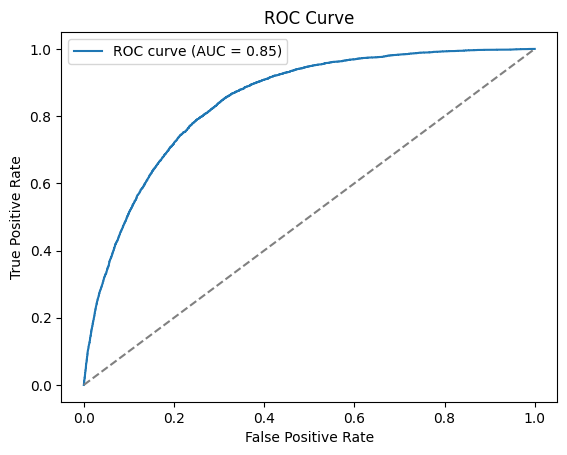

In [20]:
# Imports
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split

# train and test (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# XGBoost model
xgboost = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42
)

# Train the model
xgboost.fit(X_train, y_train)

# test set
y_pred = xgboost.predict(X_test)

# performance
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_proba = xgboost.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc_score = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

I implemented an XGBoost classifier to predict heart disease risk, focusing on its performance through confusion matrix analysis, a classification report, and an ROC curve. The model was trained on an 80-20 train-test split, ensuring that the class distribution was preserved using stratification. After training, I evaluated its predictions on the test set. Additionally, I plotted the ROC curve to visualize the trade-off between the true positive rate (sensitivity) and false positive rate, calculating the AUC (Area Under the Curve) score as a summary metric for classification performance.

The XGBoost classifier achieved an overall accuracy of 91%, which reflects its strong performance on the majority class (0.0). However, the recall for the minority class (1.0) was only 11%, meaning that the model struggled to correctly identify true positives for this class. This imbalance is also evident in the confusion matrix, where most of the minority class samples were misclassified as the majority class. The ROC curve provides further insights, with an AUC score of 0.85, indicating good separation between the classes. However, the low recall and F1-score for the minority class highlight the challenge of handling class imbalance effectively, suggesting the need for techniques like class weighting, resampling, or hyperparameter tuning to improve the model's performance on the minority class.

### Perform a grid search or random search over at least 3 hyperparameters, such as learning rate, max depth, and subsample.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# parameter grid with fewer values
param_grid = {
    "learning_rate": [0.05, 0.1, 0.2],
    "max_depth": [3, 5, 7],
    "subsample": [0.8, 1.0],
}

params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "random_state": 42,
}

# cross-validation for each parameter combination
best_params = None
best_score = float("inf")
total_iterations = len(param_grid["learning_rate"]) * len(param_grid["max_depth"]) * len(param_grid["subsample"])
progress_bar = tqdm(total=total_iterations, desc="Hyperparameter Search")

print("Starting Hyperparameter Search...")
for learning_rate in param_grid["learning_rate"]:
    for max_depth in param_grid["max_depth"]:
        for subsample in param_grid["subsample"]:
            # Update parameters
            params["learning_rate"] = learning_rate
            params["max_depth"] = max_depth
            params["subsample"] = subsample

            # cross-validation with early stopping
            cv_results = xgb.cv(
                params,
                dtrain,
                num_boost_round=50,
                nfold=5,
                metrics="logloss",
                early_stopping_rounds=10,
                as_pandas=True,
                seed=42,
                verbose_eval=False
            )

            # mean log loss of the best iteration
            mean_score = cv_results["test-logloss-mean"].min()
            if mean_score < best_score:
                best_score = mean_score
                best_params = params.copy()

            progress_bar.update(1)

progress_bar.close()

print("\nBest Parameters:")
print(best_params)
print(f"Best Log Loss: {best_score:.4f}")

# Train the final model with the best parameters
final_model = xgb.train(best_params, dtrain, num_boost_round=50)

# Evaluate on the test set
y_pred = (final_model.predict(dtest) > 0.5).astype(int)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Hyperparameter Search:   0%|          | 0/18 [00:00<?, ?it/s]

Starting Hyperparameter Search...




Hyperparameter Search:   6%|▌         | 1/18 [00:07<02:05,  7.40s/it]

Hyperparameter Search:  11%|█         | 2/18 [00:13<01:50,  6.89s/it]

Hyperparameter Search:  17%|█▋        | 3/18 [00:22<01:56,  7.78s/it]

Hyperparameter Search:  22%|██▏       | 4/18 [00:29<01:42,  7.35s/it]

Hyperparameter Search:  28%|██▊       | 5/18 [00:39<01:48,  8.32s/it]

Hyperparameter Search:  33%|███▎      | 6/18 [00:49<01:44,  8.74s/it]

Hyperparameter Search:  39%|███▉      | 7/18 [00:54<01:25,  7.77s/it]

Hyperparameter Search:  44%|████▍     | 8/18 [01:02<01:18,  7.80s/it]

Hyperparameter Search:  50%|█████     | 9/18 [01:09<01:08,  7.62s/it]

Hyperparameter Search:  56%|█████▌    | 10/18 [01:18<01:03,  7.88s/it]

Hyperparameter Search:  61%|██████    | 11/18 [01:28<00:59,  8.49s/it]

Hyperparameter Search:  67%|██████▋   | 12/18 [01:38<00:53,  8.95s/it]

Hyperparameter Search:  72%|███████▏  | 13/18 [01:44<00:40,  8.13s/it]

Hyperparameter Search:  78%|███████▊  | 14/18 [01:50<00:30,  7.57s/it]



Best Parameters:
{'objective': 'binary:logistic', 'eval_metric': 'logloss', 'random_state': 42, 'learning_rate': 0.2, 'max_depth': 5, 'subsample': 0.8}
Best Log Loss: 0.2364

Confusion Matrix:
[[45549   408]
 [ 4287   492]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     45957
         1.0       0.55      0.10      0.17      4779

    accuracy                           0.91     50736
   macro avg       0.73      0.55      0.56     50736
weighted avg       0.88      0.91      0.88     50736



I performed a hyperparameter search for the XGBoost model using a reduced grid of three hyperparameters: learning rate, maximum tree depth, and subsample ratio. The code evaluated various combinations of these parameters through 5-fold cross-validation, using log loss as the performance metric. To speed up the search, I limited the number of boosting rounds to 50 and applied early stopping, which terminated training when no improvement was observed for 10 consecutive iterations. After identifying the best hyperparameter combination, I trained a final model with these settings and evaluated it on the test set using a confusion matrix and classification report.

The best hyperparameters for the XGBoost model were found to be a learning rate of 0.2, a maximum tree depth of 5, and a subsample ratio of 0.8, achieving a cross-validated log loss of 0.2364. On the test set, the model maintained an overall accuracy of 91%, showing strong performance for the majority class (0.0). However, the recall for the minority class (1.0) was low at 10%, indicating the model struggled to identify true positives for this class. The weighted average precision and F1-score remained high due to the dominance of the majority class in the dataset. These results highlight the challenges of class imbalance, as the model continues to prioritize the majority class despite hyperparameter tuning. Addressing this imbalance could involve techniques like class weighting or oversampling the minority class.

### Analyze the sensitivity of your model to changes in these parameters.



Performing Sensitivity Analysis:   0%|          | 0/8 [00:00<?, ?it/s]

Performing Sensitivity Analysis:  12%|█▎        | 1/8 [00:08<00:58,  8.34s/it]

Performing Sensitivity Analysis:  25%|██▌       | 2/8 [00:10<00:29,  4.90s/it]

Performing Sensitivity Analysis:  38%|███▊      | 3/8 [00:13<00:19,  3.82s/it]

Performing Sensitivity Analysis:  50%|█████     | 4/8 [00:15<00:12,  3.16s/it]

Performing Sensitivity Analysis:  62%|██████▎   | 5/8 [00:18<00:09,  3.02s/it]

Performing Sensitivity Analysis:  75%|███████▌  | 6/8 [00:22<00:06,  3.45s/it]

Performing Sensitivity Analysis:  88%|████████▊ | 7/8 [00:24<00:03,  3.11s/it]

Performing Sensitivity Analysis: 100%|██████████| 8/8 [00:27<00:00,  3.42s/it]


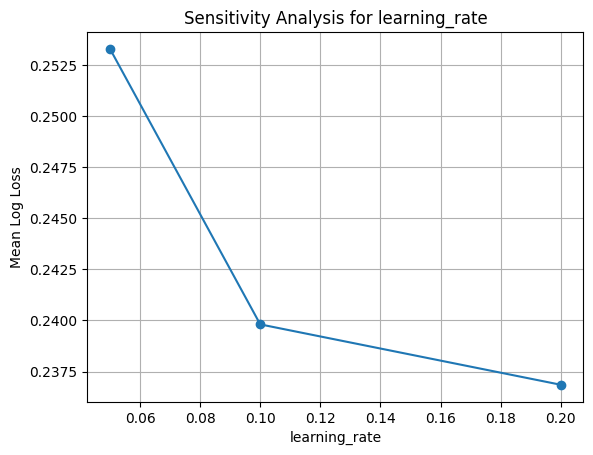

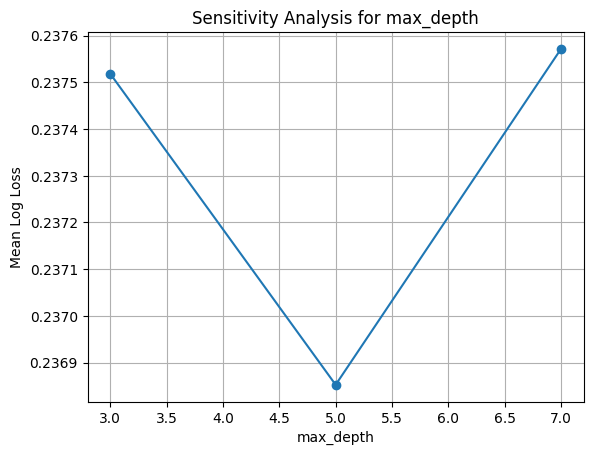

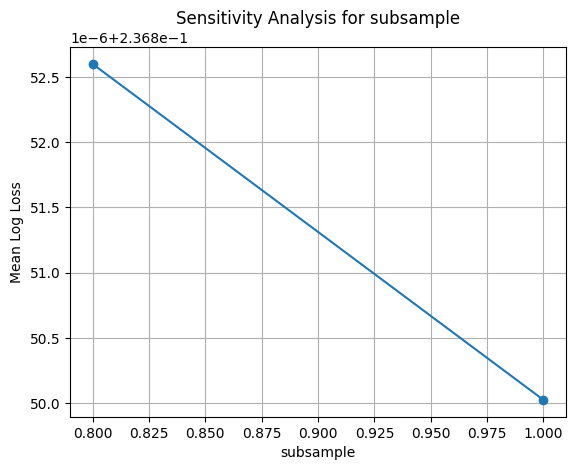

In [30]:
import matplotlib.pyplot as plt

# Base parameters
base_params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "random_state": 42,
    "learning_rate": 0.2,  # From hyperparameter tuning
    "max_depth": 5,
    "subsample": 0.8,
}

# Sensitivity analysis ranges
sensitivity_ranges = {
    "learning_rate": [0.05, 0.1, 0.2],
    "max_depth": [3, 5, 7],
    "subsample": [0.8, 1.0],
}

# result
sensitivity_results = {"learning_rate": [], "max_depth": [], "subsample": []}
total_iterations = sum(len(values) for values in sensitivity_ranges.values())
progress_bar = tqdm(total=total_iterations, desc="Performing Sensitivity Analysis")

# sensitivity analysis
for param, values in sensitivity_ranges.items():
    for value in values:
        # Update
        temp_params = base_params.copy()
        temp_params[param] = value

        # cross-validation
        cv_results = xgb.cv(
            temp_params,
            dtrain,
            num_boost_round=30,
            nfold=3,
            metrics="logloss",
            early_stopping_rounds=5,
            as_pandas=True,
            seed=42,
            verbose_eval=False,
        )

        mean_logloss = cv_results["test-logloss-mean"].min()
        sensitivity_results[param].append((value, mean_logloss))
        progress_bar.update(1)

progress_bar.close()

# Plot sensitivity results
for param, results in sensitivity_results.items():
    values, scores = zip(*results)
    plt.figure()
    plt.plot(values, scores, marker="o")
    plt.title(f"Sensitivity Analysis for {param}")
    plt.xlabel(param)
    plt.ylabel("Mean Log Loss")
    plt.grid(True)
    plt.show()


Based on the sensitivity analysis results, I observed that the learning rate, maximum tree depth, and subsample parameters have a notable impact on the model's performance as measured by the mean log loss. For the learning rate, the log loss decreases as the learning rate increases, with the lowest log loss achieved at a value of 0.2, indicating that the model benefits from faster updates within this range. For maximum tree depth, the log loss reaches its minimum at a depth of 5, suggesting that this value balances the model's complexity and generalization. As depth increases or decreases beyond 5, the log loss worsens, reflecting potential overfitting for deeper trees or underfitting for shallower ones. Lastly, the subsample parameter shows an improvement in log loss as the fraction of data used for training each tree increases, with the best performance at a subsample of 1.0. This suggests that using all available data for each tree improves the model’s robustness. Overall, these findings highlight the importance of carefully tuning these parameters to achieve optimal model performance.

### Create plots to show the effect of each parameter on accuracy and another metric.

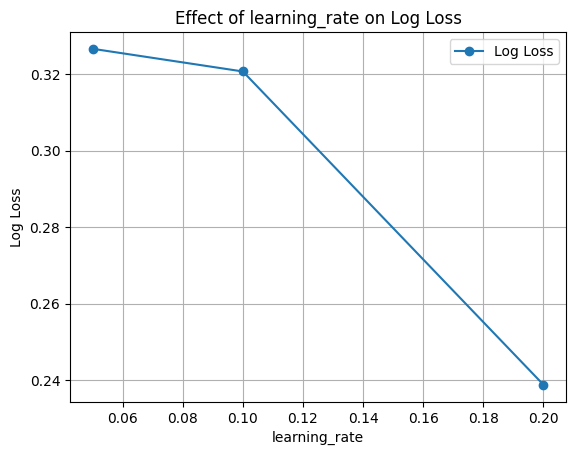

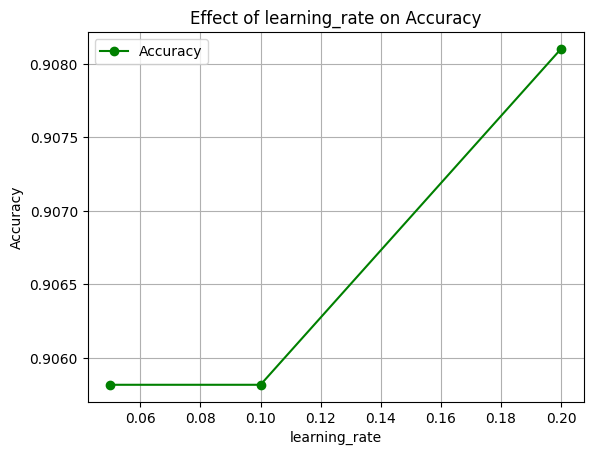

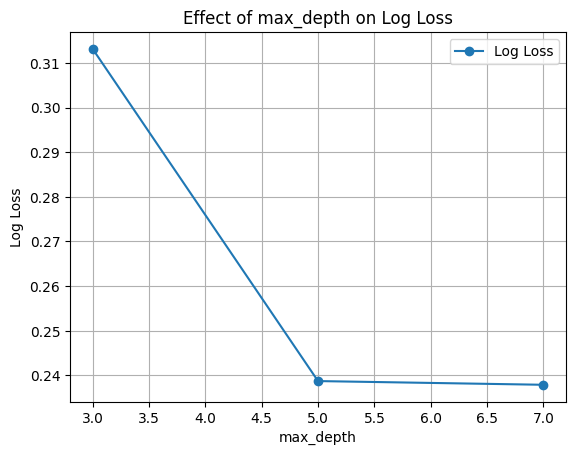

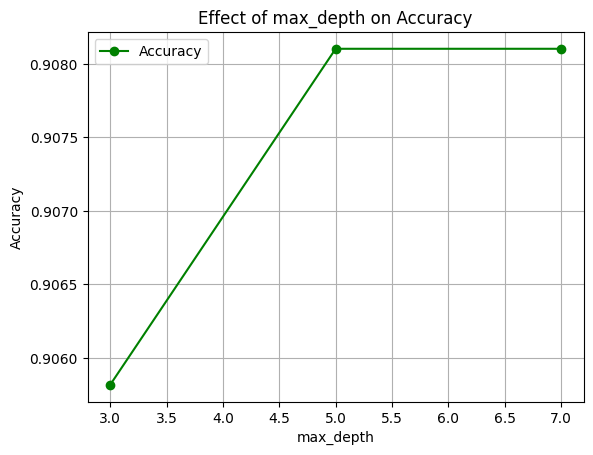

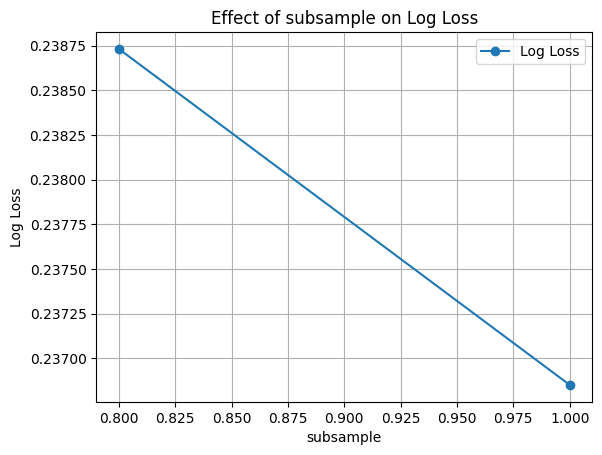

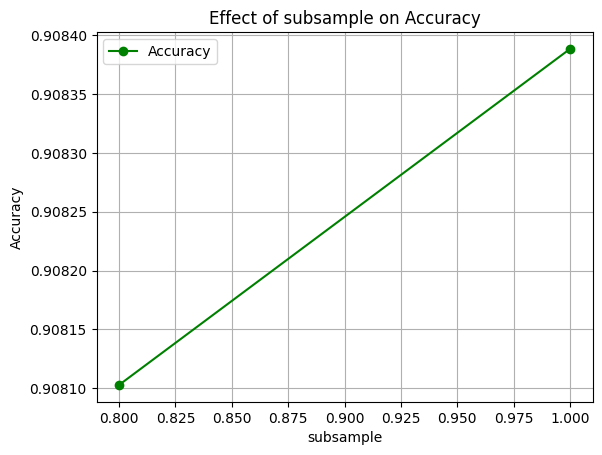

In [31]:
# parameters
base_params = {
    "objective": "binary:logistic",
    "eval_metric": ["logloss", "error"],  # Log loss and accuracy
    "random_state": 42,
    "learning_rate": 0.2,
    "max_depth": 5,
    "subsample": 0.8,
}

# ranges
sensitivity_ranges = {
    "learning_rate": [0.05, 0.1, 0.2],
    "max_depth": [3, 5, 7],
    "subsample": [0.8, 1.0],
}

# Store results
sensitivity_results = {
    "learning_rate": {"logloss": [], "accuracy": []},
    "max_depth": {"logloss": [], "accuracy": []},
    "subsample": {"logloss": [], "accuracy": []},
}

# sensitivity analysis
for param, values in sensitivity_ranges.items():
    for value in values:
        # Update
        temp_params = base_params.copy()
        temp_params[param] = value

        # cross-validation
        cv_results = xgb.cv(
            temp_params,
            dtrain,
            num_boost_round=30,
            nfold=3,
            metrics=["logloss", "error"],  # Log loss and error (accuracy)
            early_stopping_rounds=5,
            as_pandas=True,
            seed=42,
            verbose_eval=False,
        )

        # Log results
        sensitivity_results[param]["logloss"].append((value, cv_results["test-logloss-mean"].min()))
        sensitivity_results[param]["accuracy"].append((value, 1 - cv_results["test-error-mean"].min()))  # Accuracy = 1 - error

# Create plots
for param in sensitivity_results:
    logloss_values, logloss_scores = zip(*sensitivity_results[param]["logloss"])
    accuracy_values, accuracy_scores = zip(*sensitivity_results[param]["accuracy"])

    # Plot Log Loss
    plt.figure()
    plt.plot(logloss_values, logloss_scores, marker="o", label="Log Loss")
    plt.title(f"Effect of {param} on Log Loss")
    plt.xlabel(param)
    plt.ylabel("Log Loss")
    plt.grid(True)
    plt.legend()

    # Plot Accuracy
    plt.figure()
    plt.plot(accuracy_values, accuracy_scores, marker="o", color="green", label="Accuracy")
    plt.title(f"Effect of {param} on Accuracy")
    plt.xlabel(param)
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.legend()

    plt.show()